Datascources: <br> https://ourworldindata.org/coronavirus-source-data <br>
https://www.gov.za/speeches/minister-zweli-mkhize-confirms-total-686-891-cases-coronavirus-covid-19-8-oct-2020-0000

Importing the required libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing the dataset and taking a look at few records

In [3]:
covid=pd.read_excel('covid19.xlsx')
covid.head(10)

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Asia
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Asia
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Asia
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Asia
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Asia
5,2020-01-08,AF,Afghanistan,EMRO,0,0,0,0,Asia
6,2020-01-09,AF,Afghanistan,EMRO,0,0,0,0,Asia
7,2020-01-10,AF,Afghanistan,EMRO,0,0,0,0,Asia
8,2020-01-11,AF,Afghanistan,EMRO,0,0,0,0,Asia
9,2020-01-12,AF,Afghanistan,EMRO,0,0,0,0,Asia


Taking a look at column names, we notice some columns have a leading space

In [7]:
covid.columns

Index(['Date_reported', ' Country_code', ' Country', ' WHO_region',
       ' New_cases', ' Cumulative_cases', ' New_deaths', ' Cumulative_deaths',
       'Continent'],
      dtype='object')

Fixing the leading space in column names

In [4]:
col=list(covid.columns)
newcol=[i.strip() for i in col]
newcol

['Date_reported',
 'Country_code',
 'Country',
 'WHO_region',
 'New_cases',
 'Cumulative_cases',
 'New_deaths',
 'Cumulative_deaths',
 'Continent']

In [5]:
covid.columns=newcol

We have data for all countries

In [11]:
covid['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Anguilla', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia (Plurinational State of)',
       'Bonaire, Sint Eustatius and Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire',
       'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia',
       "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuad

We have data for all countries since Jan 2020 till Oct 2020

In [14]:
covid['Country'].value_counts()

Niger                       276
Finland                     276
Uzbekistan                  276
Malta                       276
Czechia                     276
                           ... 
Turks and Caicos Islands    276
Bulgaria                    276
Sri Lanka                   276
Thailand                    276
Montserrat                  276
Name: Country, Length: 235, dtype: int64

In [15]:
covid['Date_reported'].min()

Timestamp('2020-01-03 00:00:00')

In [16]:
covid['Date_reported'].max()

Timestamp('2020-10-04 00:00:00')

In [17]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Asia
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Asia
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Asia
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Asia
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Asia


Creating month column from Date column

In [6]:
covid['Month']=pd.DatetimeIndex(covid['Date_reported']).month

In [107]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent,Month
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Asia,1


Aggregating number of case per country

In [82]:
totl_cases_cntry=covid[['Country','New_cases']].groupby(by=['Country']).sum()

Sorting this data in descending order and then selecting 10 records

In [83]:
top10cases=totl_cases_cntry.sort_values(by='New_cases',ascending=False)[:10]

In [27]:
top10cases

,New_cases
Country,
United States of America,7256234
India,6549373
Brazil,4880523
Russian Federation,1215001
Colombia,841531
Peru,821564
Spain,789932
Argentina,779689
Mexico,753090


In [84]:
top10cases.reset_index(inplace=True)

In [68]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Asia
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Asia
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Asia
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Asia
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Asia


Finding number of deaths per country

In [66]:
totl_death_cntry=covid[['Country','New_deaths']].groupby(by=['Country']).sum()

Sorting and selecting top 10 values

In [67]:
top10death=totl_death_cntry.sort_values(by='New_deaths',ascending=False)[:10]

In [68]:
top10death.reset_index(inplace=True)

In [75]:
top10death

,index,Country,New_deaths
0,0,United States of America,207366
1,1,Brazil,145388
2,2,India,101782
3,3,Mexico,78492
4,4,The United Kingdom,42317
5,5,Italy,35968
6,6,Peru,32609
7,7,Spain,32086
8,8,France,31969
9,9,Iran (Islamic Republic of),26746


Plotting a horizontal bar graph for Total COVID cases, for top 10 countries

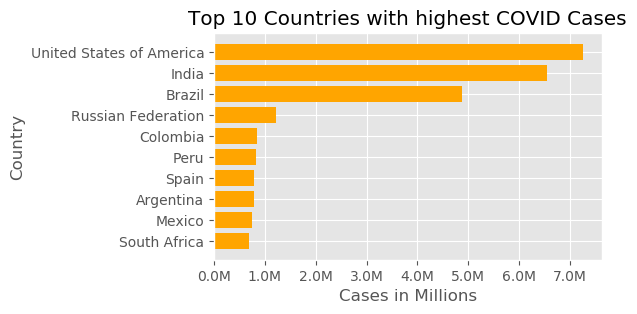

In [86]:
plt.figure(figsize=(5,3),dpi=100)
 
plt.barh(top10cases['Country'],top10cases['New_cases'],color='Orange')

ticks=np.arange(0,8000000,1000000)
xval=["{}M".format(str(val/1000000)[:3]) for val in ticks ]

plt.xticks(ticks,xval)
plt.xlabel('Cases in Millions',fontdict={'size':12})
plt.ylabel('Country',fontdict={'size':12})
plt.title('Top 10 Countries with highest COVID Cases')
plt.gca().invert_yaxis()
plt.show()




<font color ="blue">List of top 10 countries with highest COVID cases: USA tops the list followed by India and Brazil.
South Africa is at number 10.</font>

Plotting a horizontal bar graph for Total COVID deaths, for top 10 countries

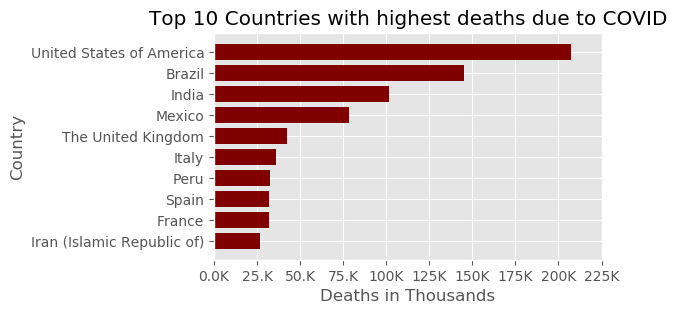

In [81]:
plt.figure(figsize=(5,3),dpi=100)
plt.barh(top10death['Country'],top10death['New_deaths'],color='maroon')
ticks=np.arange(0,250000,25000)
xval=["{}K".format(str(val/1000)[:3]) for val in ticks ]
plt.xticks(ticks,xval)
plt.xlabel('Deaths in Thousands',fontdict={'size':12})
plt.ylabel('Country',fontdict={'size':12})
plt.title('Top 10 Countries with highest deaths due to COVID')
plt.gca().invert_yaxis()
plt.show()

<font color='blue'> What is interesting to note here is that, even though UK didn’t feature in top 10 countries with highest COVID cases, it actually does come up as one of the countries with highest number of deaths due to COVID. Also most of the countries here are either from America or Europe.</font>

Zooming in into South Africa

In [107]:

covid_sa=covid[covid['Country']=='South Africa']

In [109]:
covid_sa.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent,Month
54648,2020-01-03,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54649,2020-01-04,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54650,2020-01-05,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54651,2020-01-06,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54652,2020-01-07,ZA,South Africa,AFRO,0,0,0,0,Africa,1


Plotting a line chart for Daily Covid reported cases in SA

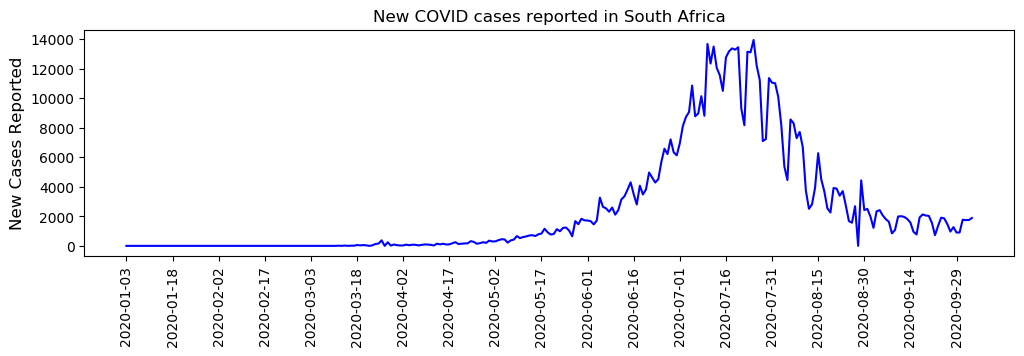

In [133]:
plt.figure(figsize=(12,3),dpi=100)
plt.plot(covid_sa['Date_reported'],covid_sa['New_cases'],color='blue')
plt.xticks(covid_sa['Date_reported'][::15],rotation=90)
plt.ylabel('New Cases Reported',fontdict={'size':12})
plt.title('New COVID cases reported in South Africa')
plt.show()


<font color='blue'> 
New Covid cases in South Africa were steadily increasing and now are on decline since July.
</font>

Plotting a line chart for Daily Covid Deaths reported in SA

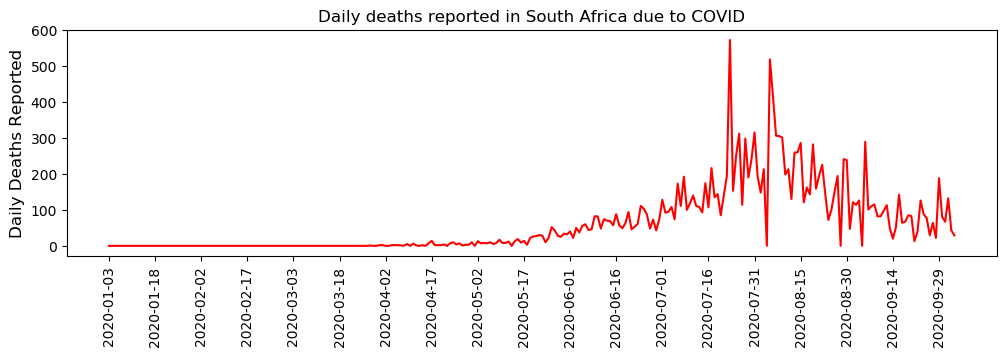

In [135]:
plt.figure(figsize=(12,3),dpi=100)
plt.plot(covid_sa['Date_reported'],covid_sa['New_deaths'],color='red')
plt.xticks(covid_sa['Date_reported'][::15],rotation=90)
plt.ylabel('Daily Deaths Reported',fontdict={'size':12})
plt.title('Daily deaths reported in South Africa due to COVID')
plt.show()

<font color='blue'> 
Number of fatalities follow the rhythm of number of cases reported.
</font>

Plotting a line chart for Cumulative Covid reported cases in SA

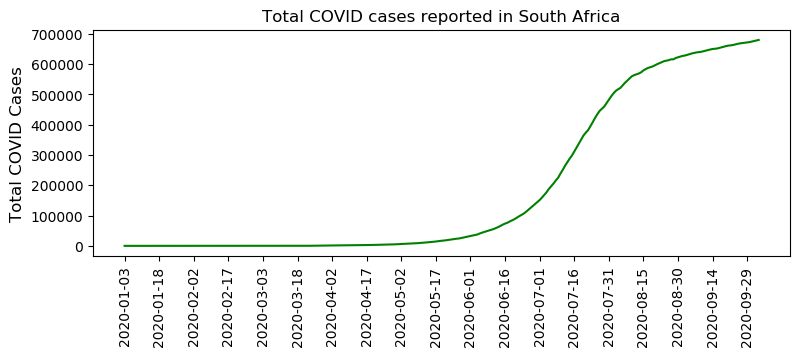

In [137]:
plt.figure(figsize=(9,3),dpi=100)
plt.plot(covid_sa['Date_reported'],covid_sa['Cumulative_cases'],color='green')
plt.xticks(covid_sa['Date_reported'][::15],rotation=90)
plt.ylabel('Total COVID Cases',fontdict={'size':12})
plt.title('Total COVID cases reported in South Africa')
plt.show()

<font color='blue'> 
Looks like we have managed to flatten the curve to a good extent </font>

Plotting a line chart for Cumulative Covid deaths in SA

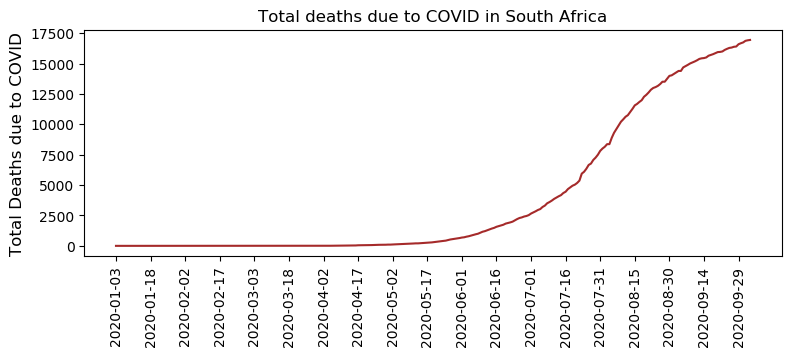

In [128]:
plt.figure(figsize=(9,3),dpi=100)
plt.plot(covid_sa['Date_reported'],covid_sa['Cumulative_deaths'],color='brown')
plt.xticks(covid_sa['Date_reported'][::15],rotation=90)
plt.ylabel('Total Deaths due to COVID',fontdict={'size':12})
plt.title('Total deaths due to COVID in South Africa')
plt.show()

Trend between Cases and Deaths

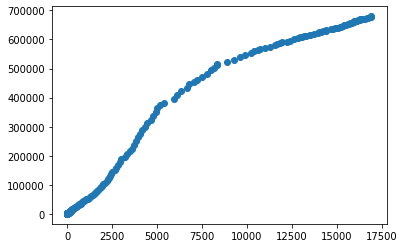

In [139]:
plt.scatter(covid_sa['Cumulative_deaths'],covid_sa['Cumulative_cases'])
plt.show()

Aggregating data for SA at Monthly level

In [108]:
mly_sa=covid_sa[['New_deaths','New_cases','Month']].groupby(by='Month').sum()

In [109]:
mly_sa.reset_index(inplace=True)

Plotting a bar plot for Monthly Deaths reported in SA

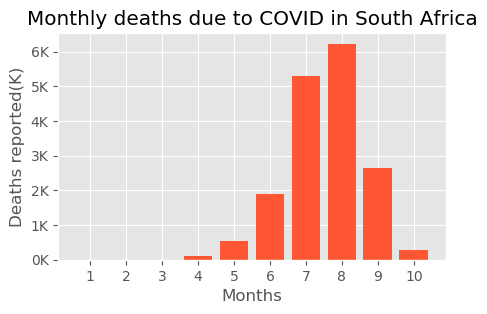

In [115]:
plt.figure(figsize=(5,3),dpi=100)
ticks=np.arange(0,7000,1000)
yval=["{}K".format(i//1000) for i in ticks]
plt.bar(mly_sa['Month'],mly_sa['New_deaths'],color='#FF5733')
plt.xlabel('Months',fontdict={'size':12})
plt.ylabel('Deaths reported(K)',fontdict={'size':12})
plt.title('Monthly deaths due to COVID in South Africa')
plt.xticks([x for x in mly_sa['Month']])
plt.yticks(ticks,yval)
plt.show()

Plotting a bar plot for Monthly Covid Cases in SA

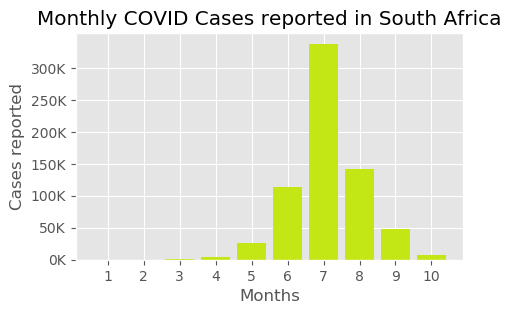

In [111]:
plt.figure(figsize=(5,3),dpi=100)
ticks=np.arange(0,350000,50000)
yval=["{}K".format(i//1000) for i in ticks]
plt.bar(mly_sa['Month'],mly_sa['New_cases'],color='#C3E615')
plt.xlabel('Months',fontdict={'size':12})
plt.ylabel('Cases reported',fontdict={'size':12})
plt.title('Monthly COVID Cases reported in South Africa')
plt.xticks([x for x in mly_sa['Month']])
plt.yticks(ticks,yval)
plt.show()

In [40]:
sa=pd.read_excel('sa_prov.xlsx')

In [41]:
sa.head()

,Province,Total cases,Percentage_total_cases,Total Deaths,Total Recoveries,Active Cases
0,Eastern Cape,89552,"13,2",3127,85301,1124
1,Free State,47676,"7,0",1051,33133,13492
2,Gauteng,220365,"32,5",4260,196638,19467
3,KwaZulu-Natal,119346,"17,6",2732,110673,5941
4,Limpopo,15642,"2,3",391,14592,659


In [42]:
sa

,Province,Total cases,Percentage_total_cases,Total Deaths,Total Recoveries,Active Cases
0,Eastern Cape,89552,"13,2",3127,85301,1124
1,Free State,47676,"7,0",1051,33133,13492
2,Gauteng,220365,"32,5",4260,196638,19467
3,KwaZulu-Natal,119346,"17,6",2732,110673,5941
4,Limpopo,15642,"2,3",391,14592,659
5,Mpumalanga,27441,"4,0",561,26160,720
6,North West,29630,"4,4",370,26592,2668
7,Northern Cape,17121,"2,5",221,13977,2923
8,Western Cape,111060,"16,4",4196,103978,2886


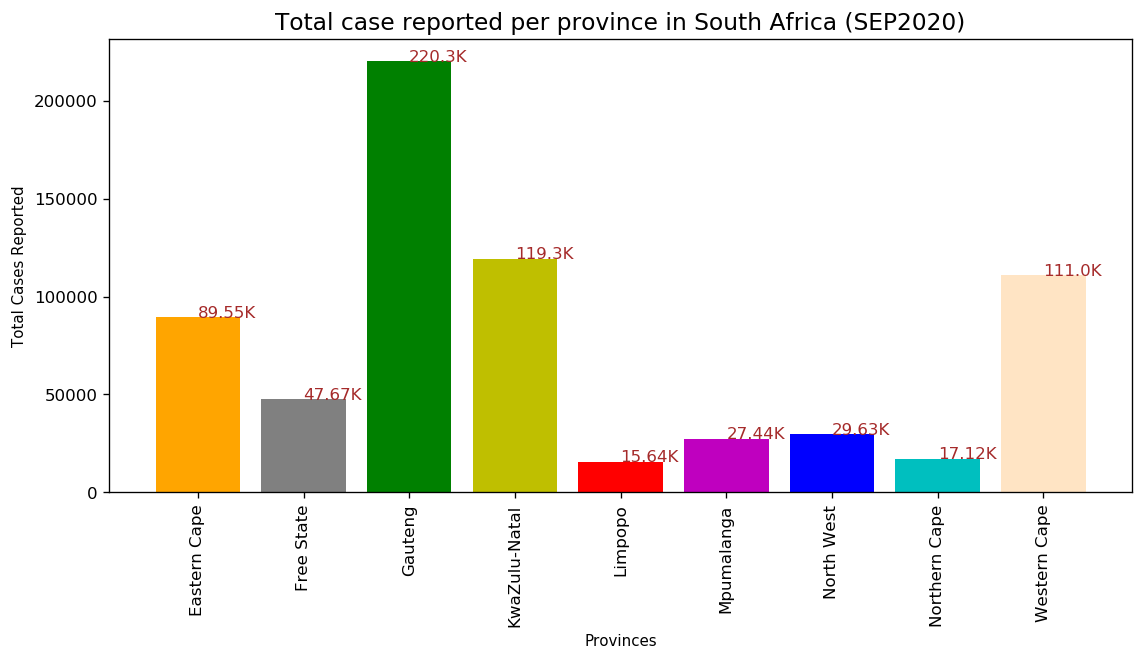

In [112]:
plt.figure(figsize=(11,5),dpi=120)
color=['orange','gray','g','y','r','m','b','c','bisque']
plt.bar(sa.Province,sa['Total cases'],color=color)
plt.xlabel('Provinces',fontdict={'size':9})
plt.ylabel('Total Cases Reported',fontdict={'size':9})
plt.title('Total case reported per province in South Africa (SEP2020)',fontdict={'size':14})
plt.xticks(rotation=90)

for xy in zip(sa.Province,sa['Total cases']):
    plt.annotate(s="{}K".format(str(xy[1]/1000)[:5]),xy=xy,textcoords='data',color='brown')
plt.show()

Plotting Total Cases,Total Deaths,Total Recoveries, Active Cases 

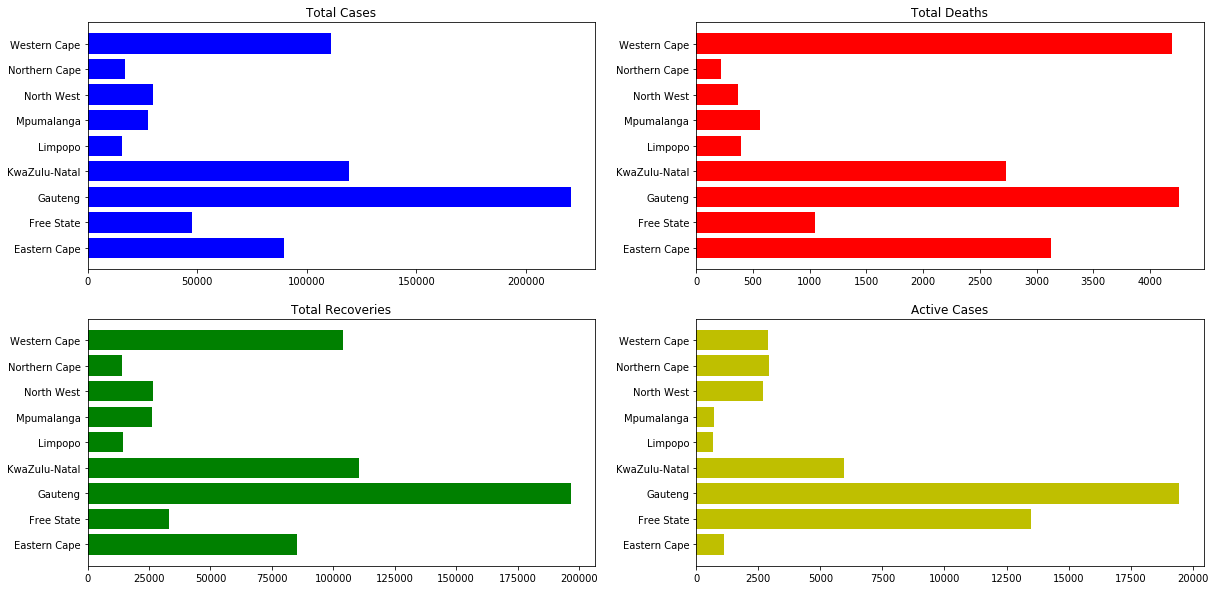

In [98]:
fig,ax=plt.subplots(nrows=2,ncols=2)
ax[0][0].barh(sa.Province,sa['Total cases'],color='b')
ax[0][1].barh(sa.Province,sa['Total Deaths'],color='r')
ax[1][0].barh(sa.Province,sa['Total Recoveries'],color='g')
ax[1][1].barh(sa.Province,sa['Active Cases'],color='y')

ax[0][0].set_title('Total Cases')
ax[0][1].set_title('Total Deaths')
ax[1][0].set_title('Total Recoveries')
ax[1][1].set_title('Active Cases')


fig.set_size_inches(20,10)
plt.show()

Aggregating the data at continent level

In [158]:
covid['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'Americas', nan],
      dtype=object)

In [7]:
asia=covid[covid['Continent']=='Asia']
europe=covid[covid['Continent']=='Europe']
africa=covid[covid['Continent']=='Africa']
ocenia=covid[covid['Continent']=='Ocenia']
america=covid[covid['Continent']=='Americas']



asiax=asia[['New_deaths','New_cases','Month']].groupby(by='Month').sum()
europex=europe[['New_deaths','New_cases','Month']].groupby(by='Month').sum()
africax=africa[['New_deaths','New_cases','Month']].groupby(by='Month').sum()
oceniax=ocenia[['New_deaths','New_cases','Month']].groupby(by='Month').sum()
americax=america[['New_deaths','New_cases','Month']].groupby(by='Month').sum()

asiax.reset_index(inplace=True)
europex.reset_index(inplace=True)
africax.reset_index(inplace=True)
oceniax.reset_index(inplace=True)
americax.reset_index(inplace=True)

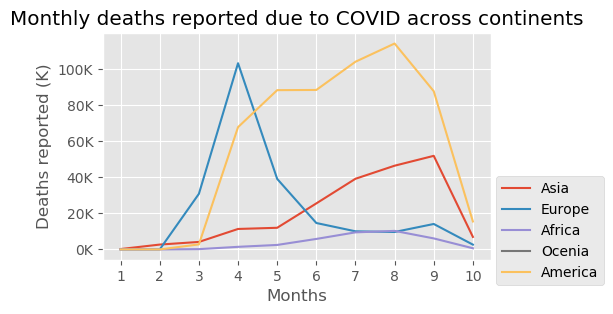

In [100]:
plt.figure(figsize=(5,3),dpi=100)
ticks=np.arange(0,120000,20000)
yval=["{}K".format(i//1000) for i in ticks]
plt.plot(asiax['Month'],asiax['New_deaths'],label='Asia')
plt.plot(europex['Month'],europex['New_deaths'],label='Europe')
plt.plot(africax['Month'],africax['New_deaths'],label='Africa')
plt.plot(oceniax['Month'],oceniax['New_deaths'],label='Ocenia')
plt.plot(americax['Month'],americax['New_deaths'],label='America')
plt.xticks([mon for mon in asiax['Month']])
plt.xlabel('Months',fontdict={'size':12})
plt.ylabel('Deaths reported (K)',fontdict={'size':12})
plt.title('Monthly deaths reported due to COVID across continents')
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.yticks(ticks,yval)
plt.show()

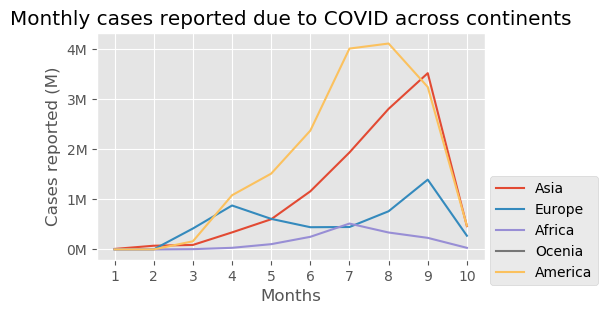

In [104]:
plt.figure(figsize=(5,3),dpi=100)
ticks=np.arange(0,5000000,1000000)
yval=["{}M".format(i//1000000) for i in ticks]
plt.plot(asiax['Month'],asiax['New_cases'],label='Asia')
plt.plot(europex['Month'],europex['New_cases'],label='Europe')
plt.plot(africax['Month'],africax['New_cases'],label='Africa')
plt.plot(oceniax['Month'],oceniax['New_cases'],label='Ocenia')
plt.plot(americax['Month'],americax['New_cases'],label='America')
plt.xticks([mon for mon in asiax['Month']])
plt.xlabel('Months',fontdict={'size':12})
plt.ylabel('Cases reported (M)',fontdict={'size':12})
plt.title('Monthly cases reported due to COVID across continents')
plt.yticks(ticks,yval)
plt.legend(bbox_to_anchor=(1.31,0.4))
plt.show()

In [103]:
glbl_deaths_cont=covid[['New_deaths','Continent']].groupby(by='Continent').sum()

In [26]:

glbl_deaths_cont.sort_values(by='New_deaths',inplace=True)

In [42]:
glbl_deaths_cont.reset_index(inplace=True)

In [53]:
glbl_deaths_cont

,Continent,New_deaths
0,Oceania,988
1,Africa,36377
2,Asia,200208
3,Europe,224174
4,Americas,568358


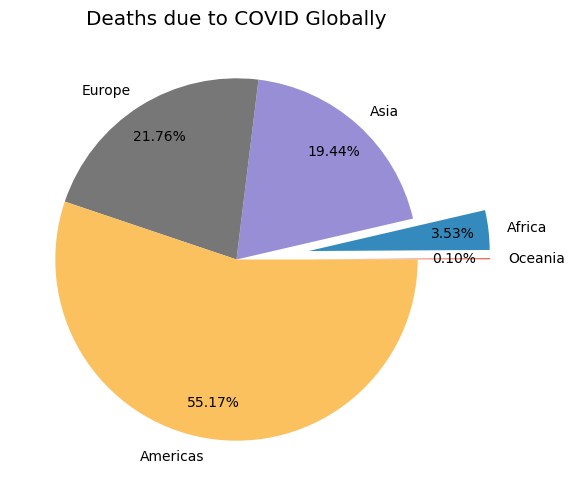

In [58]:
labels=[con for con in glbl_deaths_cont['Continent']]
plt.style.use('ggplot')
plt.figure(figsize=(8,6),dpi=100)
explode=(0.4,0.4,0,0,0)
plt.pie(glbl_deaths_cont['New_deaths'],labels=labels,autopct="%.2f%%",pctdistance=0.8,explode=explode)
plt.title('Deaths due to COVID Globally')
plt.show()

In [116]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent,Month
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0,Asia,1
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0,Asia,1


In [117]:
covid_sa.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,Continent,Month
54648,2020-01-03,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54649,2020-01-04,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54650,2020-01-05,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54651,2020-01-06,ZA,South Africa,AFRO,0,0,0,0,Africa,1
54652,2020-01-07,ZA,South Africa,AFRO,0,0,0,0,Africa,1
